<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook i'll try to practice all the classification algorithms that i have learned in macine learning with python course.

Let's first load the required libraries:


In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [4]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [5]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-09-20 19:57:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-09-20 19:57:29 (157 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [6]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [7]:
df.shape

(346, 10)

### Convert to date time object


In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [10]:
!pip install seaborn

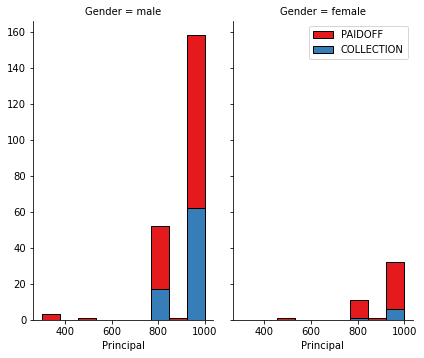

In [11]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
g.fig.set_figwidth(6)
g.fig.set_figheight(6)
plt.show()

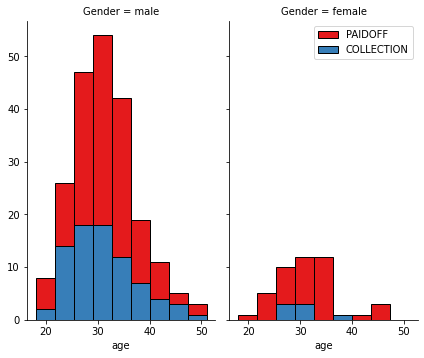

In [12]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
g.fig.set_figwidth(6)
g.fig.set_figheight(6)
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


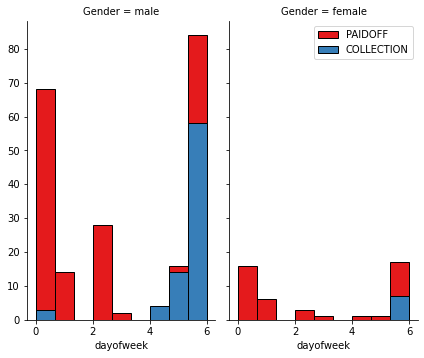

In [13]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
g.fig.set_figwidth(6)
g.fig.set_figheight(6)
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [14]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [18]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [19]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [20]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [21]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [22]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


I will be using the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

# K Nearest Neighbor(KNN)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [24]:
# we create a loop to calcuate the best K value
for k in range(3,7):
    # we train the model and predict  
    loan_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = loan_knn.predict(X_test)
    print("For K of: {}".format(k))
    print("Train set Accuracy is: ", metrics.accuracy_score(y_train, loan_knn.predict(X_train)))
    print("Test set Accuracy is: ", metrics.accuracy_score(y_test, yhat))

For K of: 3
Train set Accuracy is:  0.8333333333333334
Test set Accuracy is:  0.7428571428571429
For K of: 4
Train set Accuracy is:  0.8152173913043478
Test set Accuracy is:  0.7
For K of: 5
Train set Accuracy is:  0.8188405797101449
Test set Accuracy is:  0.7428571428571429
For K of: 6
Train set Accuracy is:  0.7971014492753623
Test set Accuracy is:  0.7142857142857143


### So the best results are when k=3

In [25]:
loan_knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)
yhat = loan_knn.predict(X_test)
print("Train set Accuracy is: ", metrics.accuracy_score(y_train, loan_knn.predict(X_train)))
print("Test set Accuracy is: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy is:  0.8333333333333334
Test set Accuracy is:  0.7428571428571429


# Decision Tree


In [26]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
for d in range(3,9):
    loan_tree = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    loan_tree.fit(X_train, y_train)
    yhat_tree = loan_tree.predict(X_test)
    print("For depth of: {}".format(d))
    print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat_tree))

For depth of: 3
DecisionTrees's Accuracy:  0.6142857142857143
For depth of: 4
DecisionTrees's Accuracy:  0.6142857142857143
For depth of: 5
DecisionTrees's Accuracy:  0.6428571428571429
For depth of: 6
DecisionTrees's Accuracy:  0.7714285714285715
For depth of: 7
DecisionTrees's Accuracy:  0.7571428571428571
For depth of: 8
DecisionTrees's Accuracy:  0.7571428571428571


### So the best accuracy is when the depth of the tree is 6

In [27]:
loan_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
loan_tree.fit(X_train, y_train)
yhat_tree = loan_tree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat_tree))

DecisionTrees's Accuracy:  0.7714285714285715


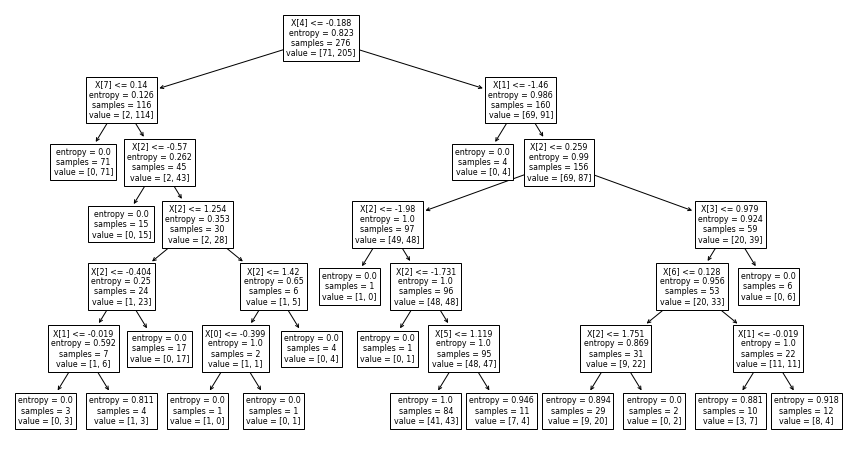

In [28]:
plt.figure(figsize=(15,8))
tree.plot_tree(loan_tree)
plt.show()

# Support Vector Machine


In [29]:
from sklearn import svm
loan_svm = svm.SVC(kernel='rbf')
loan_svm.fit(X_train, y_train) 

SVC()

In [30]:
yhat_svm = loan_svm.predict(X_test)
print("Support Vector Machine's Accuracy: ", metrics.accuracy_score(y_test, yhat_svm))

Support Vector Machine's Accuracy:  0.7428571428571429


# Logistic Regression


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [32]:
for c in range(6):
    loan_lr = LogisticRegression(C=(0.0001*(10**c)), solver='liblinear').fit(X_train,y_train)
    yhat_lr = loan_lr.predict(X_test)
    print("For C is: {}".format(0.0001*(10**c)))
    print("Logistic Regresion's Accuracy: ", metrics.accuracy_score(y_test, yhat_lr))

For C is: 0.0001
Logistic Regresion's Accuracy:  0.6285714285714286
For C is: 0.001
Logistic Regresion's Accuracy:  0.6714285714285714
For C is: 0.01
Logistic Regresion's Accuracy:  0.6857142857142857
For C is: 0.1
Logistic Regresion's Accuracy:  0.7428571428571429
For C is: 1.0
Logistic Regresion's Accuracy:  0.7142857142857143
For C is: 10.0
Logistic Regresion's Accuracy:  0.7142857142857143


### So the best accuracy is when C = 0.1 and solver is 'liblinear'

In [33]:
loan_lr = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
yhat_lr = loan_lr.predict(X_test)
print("Logistic Regresion's Accuracy: ", metrics.accuracy_score(y_test, yhat_lr))

Logistic Regresion's Accuracy:  0.7428571428571429


# Model Evaluation using Test set


In [34]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [35]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-09-20 19:57:35--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-09-20 19:57:36 (119 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [36]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Load Test set for evaluation


In [37]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
# test_df[['Principal','terms','age','Gender','education']].head()
test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1,inplace=True)
test_X = test_feature
test_X = preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_y = test_df['loan_status'].values
print('Test set:', test_X.shape,  test_y.shape)

Test set: (54, 8) (54,)


In [38]:
knn_y_values = loan_knn.predict(test_X)
print("F1 Score is: : %.2f" % f1_score(test_y, knn_y_values, average='weighted'))
print("Jaccard Score is: : %.2f" % jaccard_score(test_y, knn_y_values,pos_label='PAIDOFF'))

F1 Score is: : 0.70
Jaccard Score is: : 0.67


In [39]:
tree_y_values = loan_tree.predict(test_X)
print("F1 Score is: : %.2f" % f1_score(test_y, tree_y_values, average='weighted'))
print("Jaccard Score is: : %.2f" % jaccard_score(test_y, tree_y_values,pos_label='PAIDOFF'))

F1 Score is: : 0.67
Jaccard Score is: : 0.71


In [40]:
svm_y_values = loan_svm.predict(test_X)
print("F1 Score is: : %.2f" % f1_score(test_y, svm_y_values, average='weighted'))
print("Jaccard Score is: : %.2f" % jaccard_score(test_y, svm_y_values,pos_label='PAIDOFF'))

F1 Score is: : 0.76
Jaccard Score is: : 0.78


In [41]:
lr_y_values = loan_lr.predict(test_X)
print("F1 Score is: : %.2f" % f1_score(test_y, lr_y_values, average='weighted'))
print("Jaccard Score is: : %.2f" % jaccard_score(test_y, lr_y_values, pos_label='PAIDOFF'))
yhat_prob = loan_lr.predict_proba(test_X)
print("Log Loss is: : %.2f" % log_loss(test_y, yhat_prob))

F1 Score is: : 0.67
Jaccard Score is: : 0.75
Log Loss is: : 0.48


# Report


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.67    | 0.70     | NA      |
| Decision Tree      | 0.71    | 0.67     | NA      |
| SVM                | 0.78    | 0.76     | NA      |
| LogisticRegression | 0.67    | 0.75     | 0.48    |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>